# 🌳 Decision Tree 

## ✅ What is a Decision Tree?

A **Decision Tree** is a **non-parametric supervised learning algorithm**.  
This means:
- It **does not assume** anything about the distribution of data.
- There are **no parameters** to learn like in linear models.

Hence, it can work well on **non-linear datasets**.

- It is a **white-box model** – easy to interpret.
- It can be used for **both Classification and Regression** tasks.

---

## 🌱 Components of a Decision Tree

- **Root Node**: The topmost node representing the entire dataset.
- **Decision Node**: A node where the dataset is split based on a condition.
- **Branch / Subtree**: Connects nodes and represents decision outcomes.
- **Leaf Node**: Terminal nodes that contain final output values (class or prediction).



## 🌳 Simple Structure of a Decision Tree

```text
        Root Node
          /    \
   Decision   Decision
      Node       Node
     /   \         \
  Leaf  Leaf      Leaf


- **Root Node**: Start of the tree (entire dataset)

- **Decision Nodes**: Points where data is split

- **Leaf Nodes**: Final outputs (class labels or predictions)

## 🌳 Pure Node in Decision Trees

A **Pure Node** is a node in a decision tree where **all the samples belong to the same class**.

---

### ✅ Characteristics of a Pure Node

- All data points in the node have the **same label**.
- **No further splitting** is needed.
- It typically becomes a **Leaf Node**.

---

### 🧪 Example

- Pure Node:  
  `["Apple", "Apple", "Apple"]` → ✅ All same class → **Pure**

- Impure Node:  
  `["Apple", "Orange", "Apple"]` → ❌ Mixed classes → **Impure**

---

### 🎯 Why Is Purity Important?

- The **goal** of a decision tree is to split data to make nodes **as pure as possible**.
- Metrics like **Gini Impurity** and **Entropy** are used to measure and reduce **impurity** during training.

---

### 📌 Summary Table

| Term           | Description                                 |
|----------------|---------------------------------------------|
| **Pure Node**  | All samples belong to **one class**         |
| **Impure Node**| Contains a **mix of different classes**     |
| **Objective**  | Keep splitting until you reach **pure nodes** |

---



---

## 🔍 How Does It Work?

### Step 1: Choose the Best Feature to Split
- For each feature (column), we calculate a **splitting criterion**.
- The goal is to find:
  - The **best column** to split on.
  - The **best value** within that column to split.

This decision is made using an **impurity function**.

---

## 🔢 Impurity Measures

### For **Classification**:
- **Gini Impurity** (default in CART)
- **Entropy**

### For **Regression**:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **Variance**

We pick the split where impurity (G) is **minimized**.

**Pure Node**: A node is pure if all its data points belong to a single class.

---

## 🔣 Gini Impurity (Classification)

- Gini measures how often a randomly chosen element would be incorrectly labeled.
- Formula:
  $$
  G = 1 - \sum_{i=1}^{n} p_i^2
  $$

Where \( p_i \) is the probability of class \( i \).

---

## 🛠️ Algorithm Used

- **CART** (Classification and Regression Tree) is the most common algorithm.
- It grows the tree by recursively splitting nodes based on impurity.

---

## ✅ Advantages

1. Simple to understand and interpret.
2. Requires **less data preparation** (no need for normalization or scaling).
3. Fast: **log(n)** time complexity for prediction.
4. Can handle both **numerical and categorical** data.
5. Works well on **non-linear** datasets.
6. Can **measure feature importance**.

---

## ⚠️ Disadvantages

1. Prone to **overfitting** if the tree is too deep.
2. **Unstable** with small changes in data.
3. **Not ideal for extrapolation** beyond the range of data.

---





## Coming Next:
- Splitting Criteria in Detail (Gini, Entropy)
- Tree Pruning
- Decision Tree Code & Visualizations
- Random Forests (Ensemble of Trees)

## 📌 Feature Importance Formula Breakdown in Decision Tree (Using Gini Impurity)

The **feature importance** for a particular feature is computed based on the **reduction in impurity** after a split at a given node.

Let’s define the formula:

$$
\Delta I(f, t) = N_t \cdot \left[ \text{Impurity}(t) - \left( \frac{N_{t_L}}{N_t} \cdot \text{Impurity}(t_L) + \frac{N_{t_R}}{N_t} \cdot \text{Impurity}(t_R) \right) \right]
$$

Where:
- \( \Delta I(f, t) \): Importance contribution from feature \( f \) at node \( t \)
- \( N_t \): Number of samples at node \( t \)
- \( N_{t_L} \): Number of samples in the **left** child node
- \( N_{t_R} \): Number of samples in the **right** child node
- \( \text{Impurity}(t) \): Impurity at node \( t \) (we consider **Gini** impurity here)
- \( \text{Impurity}(t_L), \text{Impurity}(t_R) \): Impurity at left and right child nodes respectively

---

### 🔍 Notations Explained

| Symbol         | Description |
|----------------|-------------|
| \( N \)        | Total number of samples in the full dataset |
| \( N_t \)      | Number of samples in the current node |
| \( N_{t_L} \)  | Number of samples in the left child after split |
| \( N_{t_R} \)  | Number of samples in the right child after split |
| Impurity       | We use **Gini impurity** for all calculations |

---

### ✅ Final Feature Importance

To get the overall importance for a feature, sum this impurity reduction across **all nodes** where that feature is used for splitting:

$$
\text{Importance}(f) = \sum_{\text{nodes using } f} \Delta I(f, t)
$$

Then normalize:

$$
\text{Normalized Importance}(f) = \frac{\text{Importance}(f)}{\sum_{j} \text{Importance}(j)}
$$

---

This formula helps us **quantify** how much each feature contributes to making better splits in the tree!



## ✂️ Pruning in Decision Trees (Overfitting Control)

One major challenge with decision trees is **overfitting** — when the tree becomes too complex and learns noise from the training data.

**Pruning** is a technique used to reduce the size of the tree and improve generalization by removing parts of the tree that do not provide significant predictive power.

---

### 🔍 Why is Pruning Needed?

- Trees can grow **very deep**, learning from noise in training data
- Over-complex trees tend to **overfit**
- Pruning helps in:
  - Simplifying the model
  - Reducing variance
  - Improving test accuracy

---

## Types of Pruning

### 1. **Pre-Pruning** (a.k.a Early Stopping)

- Tree stops growing **before** it becomes overly complex
- Decision is made **during** the tree-building process
- Common parameters used:
  - `max_depth`: Maximum depth of the tree
  - `min_samples_split`: Minimum number of samples required to split a node
  - `min_samples_leaf`: Minimum number of samples required in a leaf node
  - `max_leaf_nodes`: Maximum number of leaf nodes allowed
  - `min_impurity_decrease`: Minimum impurity reduction required for a split
  - `max_features`: Max number of features to consider when splitting

**Advantages:**
- Simple and fast
- Reduces model complexity during training

**Disadvantages:**
- Risk of **underfitting** if stopped too early
- Requires **fine-tuning** of parameters
- Can be **short-sighted** — may miss good splits that come later

---

### 2. **Post-Pruning** (a.k.a Cost-Complexity Pruning)

- Tree is first **fully grown**
- Then it's **pruned back** by removing nodes that have little importance

**How it works:**
- Evaluate the importance of nodes based on performance or complexity cost
- Nodes with **low contribution** to prediction are removed
- This improves generalization on test data

Scikit-learn uses **Cost-Complexity Pruning** via `ccp_alpha` parameter in `DecisionTreeClassifier`:




## 🧠 Assumptions and Limitations of Decision Trees

---

### ✅ Assumptions of Decision Trees

1. **No Assumption About Data Distribution**
   - Decision Trees are **non-parametric** models.
   - They do **not assume linearity**, normality, or any underlying statistical distribution.

2. **Feature Independence at Each Split**
   - At each split, the algorithm assumes features are **independently evaluated** to find the best split.
   - It doesn’t account for **correlated features** during the split process.

3. **Greedy Splitting**
   - The algorithm uses a **greedy approach**: at each node, it picks the **best split locally**, assuming it leads to the best global structure.
   - It doesn't backtrack or look ahead for optimal future splits.

4. **Same Feature Can Be Reused**
   - A single feature can be used multiple times at different nodes in the tree, assuming that’s the most informative split at each step.

---

### ⚠️ Limitations of Decision Trees

1. **Overfitting**
   - Deep trees can overfit the training data, especially when the tree is not pruned.
   - They may memorize noise or outliers, hurting generalization.

2. **High Variance**
   - A small change in data can result in a **completely different structure**.
   - This makes the model unstable unless using techniques like **bagging (e.g., Random Forests)**.

3. **Bias Toward Features with More Levels**
   - Features with more categories or unique values (e.g., ID numbers) are more likely to be selected for splits, even if not truly useful.

4. **Not Good for Extrapolation**
   - Especially in regression, trees can’t **extrapolate** beyond the observed data range.

5. **Harder to Learn Smooth Functions**
   - Decision trees create **stepwise predictions** — not ideal for capturing smooth trends in data.

6. **Sensitive to Unbalanced Data**
   - In classification, if one class dominates, the tree might be biased toward the majority class unless class weights or balancing techniques are used.

---

### 📌 Summary

| Category       | Details |
|----------------|---------|
| Type           | Non-parametric, rule-based model |
| Best For       | Data with complex, non-linear relationships |
| Not Ideal For  | Very noisy or small datasets, extrapolation tasks |
| Fixes          | Use pruning, bagging (Random Forest), boosting (XGBoost) to overcome weaknesses |

---


## 🌳 Decision Tree for Regression – Step-by-Step Example

---

### 📘 Objective

To understand how a Decision Tree splits data for regression using **Mean Squared Error (MSE)** as the splitting criterion.

---

### 🧾 Example Dataset

Let's take a tiny dataset with one feature `X` and a target `y`:

| Index | X | y  |
|-------|---|----|
| 0     | 1 | 2  |
| 1     | 2 | 4  |
| 2     | 3 | 6  |
| 3     | 4 | 8  |
| 4     | 5 | 10 |

---

### 🧮 Step 1: Try All Possible Splits

We will try splits **between values of X**, i.e., at:

- Split 1: \( X < 1.5 \)
- Split 2: \( X < 2.5 \)
- Split 3: \( X < 3.5 \)
- Split 4: \( X < 4.5 \)

For each split, we compute the **Mean Squared Error (MSE)** of the resulting groups and choose the split with the **lowest total MSE**.

---

### 📐 Step 2: Calculate MSE for Each Split

#### 🔹 Example: Split at \( X < 2.5 \)

**Left Group:**  
Data = (X = 1, 2) → y = [2, 4]  
Mean = 3  

$$
\text{MSE}_{\text{left}} = \frac{(2 - 3)^2 + (4 - 3)^2}{2} = \frac{1 + 1}{2} = 1.0
$$

**Right Group:**  
Data = (X = 3, 4, 5) → y = [6, 8, 10]  
Mean = 8  

$$
\text{MSE}_{\text{right}} = \frac{(6 - 8)^2 + (8 - 8)^2 + (10 - 8)^2}{3} = \frac{4 + 0 + 4}{3} = 2.67
$$

**Total Weighted MSE**:

$$
\text{Total MSE} = \frac{2}{5} \cdot 1.0 + \frac{3}{5} \cdot 2.67 = 0.4 + 1.6 = 2.0
$$

---

Repeat similar calculations for other splits to find the one with the lowest total MSE.

---

### ✅ Best Split

The split with the **lowest total weighted MSE** is selected.  
In our case, let's assume the best split is at:  
$$
X < 2.5
$$

---

### 🌳 Final Regression Tree (Simplified Structure)



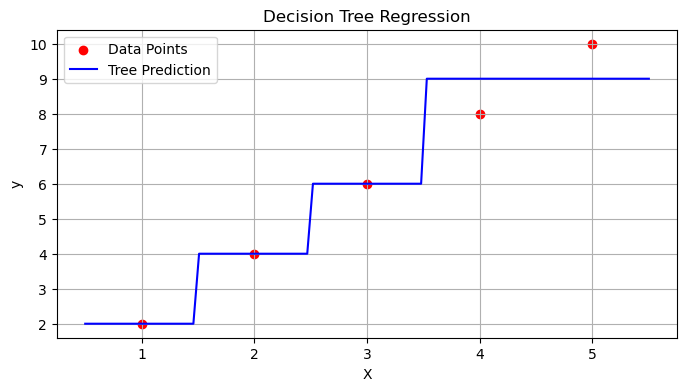

In [4]:


### 📉 Optional: Python Code to Visualize the Tree Prediction


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Fit Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

# Prediction range
X_test = np.linspace(0.5, 5.5, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X_test, y_pred, color='blue', label='Tree Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## 🌳 Decision Tree Classifier – Step-by-Step Example

---

### 📘 Objective

To understand how a **Decision Tree Classifier** splits data using **Gini Impurity**, and visualize the final tree.

---

### 🧾 Example Dataset

Let’s use a small dataset with one feature `X` and a target class `y`:

| Index | X | y (Class) |
|-------|---|-----------|
| 0     | 1 | A         |
| 1     | 2 | A         |
| 2     | 3 | B         |
| 3     | 4 | B         |
| 4     | 5 | B         |

---

### 📐 Step 1: Try All Possible Splits

We will try splitting the dataset at:

- Split 1: \( X < 1.5 \)
- Split 2: \( X < 2.5 \)
- Split 3: \( X < 3.5 \)
- Split 4: \( X < 4.5 \)

We will compute **Gini impurity** for left and right splits at each point.

---

### 🧮 Step 2: Compute Gini Impurity

#### 🔹 Example: Split at \( X < 2.5 \)

**Left Group:** (X = 1, 2) → y = [A, A]  
- All belong to class A → Gini = 0

**Right Group:** (X = 3, 4, 5) → y = [B, B, B]  
- All belong to class B → Gini = 0

**Total Gini:**

$$
\text{Gini} = \frac{2}{5} \cdot 0 + \frac{3}{5} \cdot 0 = 0
$$

✅ **Perfect split!** (No impurity)

---

### ✅ Best Split

Since Gini is **lowest (0.0)** at \( X < 2.5 \), this becomes our first split.

---

### 🌳 Final Classification Tree (Simple)



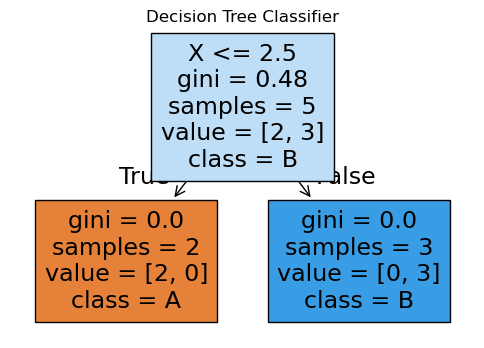

In [5]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array(['A', 'A', 'B', 'B', 'B'])

# Train classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(6, 4))
plot_tree(clf, filled=True, feature_names=["X"], class_names=clf.classes_)
plt.title("Decision Tree Classifier")
plt.show()


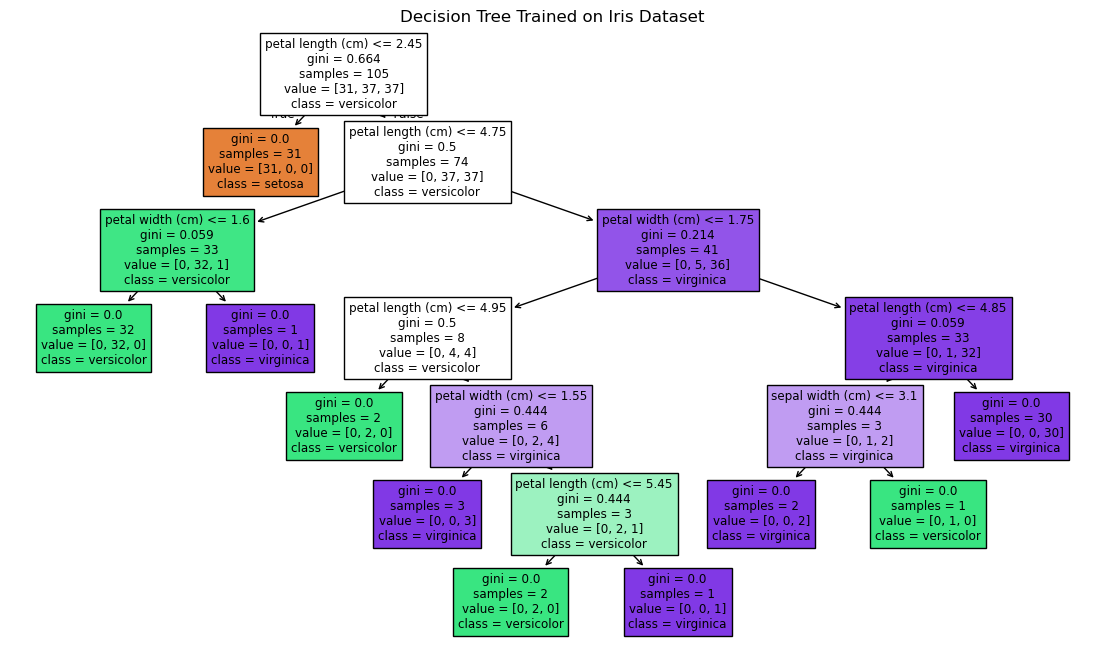

In [6]:
# Re-import necessary packages after code execution state reset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()
